In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
path = "/content/drive/MyDrive/Intership technical challenge 2023 (eT3)/dairies"

In [34]:
%matplotlib inline
import os
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import datetime
import torch
import matplotlib.pyplot as plt
import shutil

In [35]:
path

'/content/drive/MyDrive/Intership technical challenge 2023 (eT3)/dairies'

In [36]:
os.listdir(path)

['Garant-Ecological-Medium-Fat-Milk',
 'Arla-Medium-Fat-Milk',
 'generic',
 'Arla-Standard-Milk',
 'Arla-Ecological-Medium-Fat-Milk']

In [37]:


# Source directory where your dataset is located
source_directory = "/content/drive/MyDrive/Intership technical challenge 2023 (eT3)/dairies/"

# Destination directory where you want to copy all the images
destination_directory = "/content/drive/MyDrive/Intership technical challenge 2023 (eT3)/res/"

# Ensure the destination directory exists, create it if necessary
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Iterate through all files and subdirectories in the source directory
for root, _, files in os.walk(source_directory):
    for file in files:
        # Check if the file is an image (you can add more extensions if needed)
        if file.endswith((".jpg", ".jpeg", ".png", ".gif")):
            # Construct the source and destination paths
            source_path = os.path.join(root, file)
            destination_path = os.path.join(destination_directory, file)

            # Copy the image to the destination directory
            shutil.copy2(source_path, destination_path)
            #print(f"Copying {source_path} to {destination_path}")

print("All images copied to the destination folder.")

All images copied to the destination folder.


In [38]:
modification_timestamp = os.path.getmtime(path)

# Convert the timestamp to a datetime object
modification_datetime = datetime.datetime.fromtimestamp(os.path.getmtime("/content/drive/MyDrive/Intership technical challenge 2023 (eT3)/dairies/Arla-Ecological-Medium-Fat-Milk/Arla-Ecological-Medium-Fat-Milk_001.jpg"))

# Print the last modification date and time
print("Last Modification Date and Time:", modification_datetime)

Last Modification Date and Time: 2023-08-23 12:34:19


In [39]:
file_names = os.listdir(destination_directory)
data = [
    (file.split("-")[-1] , os.path.getsize(os.path.join(destination_directory, file)) ,
     datetime.datetime.fromtimestamp(os.path.getmtime(os.path.join(destination_directory, file))))
    for file in file_names
]
df = pd.DataFrame(data, columns=["File Name", "File Size (bytes)" , "Image Modification Date"])

In [40]:
df

,File Name,File Size (bytes),Image Modification Date
0,Milk_006.jpg,26808,2023-07-26 10:28:08
1,Oatghurt_002.jpg,24144,2023-07-26 10:28:08
2,Oatghurt_004.jpg,22319,2023-07-26 10:28:08
3,Oatghurt_001.jpg,21314,2023-07-26 10:28:08
4,Oatghurt_005.jpg,24304,2023-07-26 10:28:08
5,Milk_005.jpg,21029,2023-07-26 10:28:08
6,Milk_002.jpg,21837,2023-07-26 10:28:08
7,Milk_003.jpg,27535,2023-07-26 10:28:08
8,Milk_004.jpg,28137,2023-07-26 10:28:08
9,Oatghurt_003.jpg,26866,2023-07-26 10:28:08


In [41]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7fbSc2pBquuwsB9V4unj")
project = rf.workspace("nitrous-xd-jbv97").project("internship-technical-challenge")
dataset = project.version(1).download("coco")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Internship-Technical-Challenge-1 in coco:: 100%|██████████| 44/44 [00:00<00:00, 365.75it/s]


In [42]:
from roboflow import Roboflow
import cv2

# Initialize Roboflow
rf = Roboflow(api_key="7fbSc2pBquuwsB9V4unj")

# Specify the test path and get a list of image file names
test_path = "/content/Internship-Technical-Challenge-1/test/"
img_test_paths = os.listdir(test_path)

# Load the model
project = rf.workspace().project("internship-technical-challenge")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


In [43]:
test_path = "/content/Internship-Technical-Challenge-1/test/"
img_test_paths = []
# Iterate through files in the directory
for filename in os.listdir(test_path):
  # Check if the file has an image extension (e.g., .jpg, .png)
  if filename.endswith(".jpg"):
    img_test_paths.append(filename)

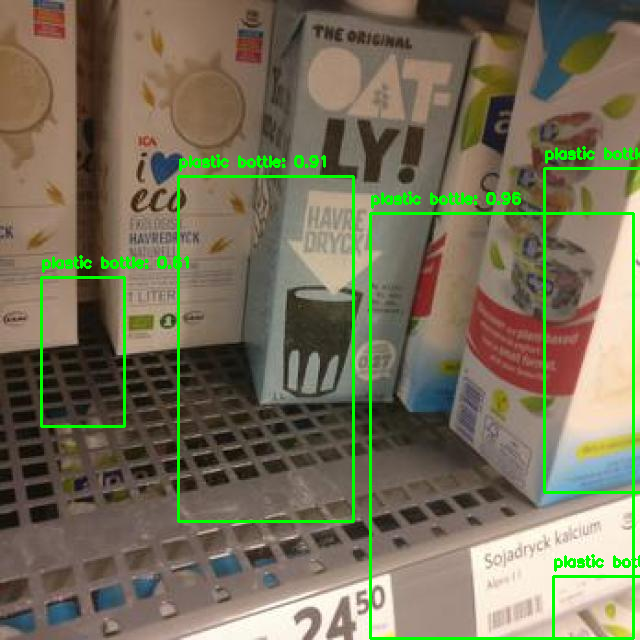

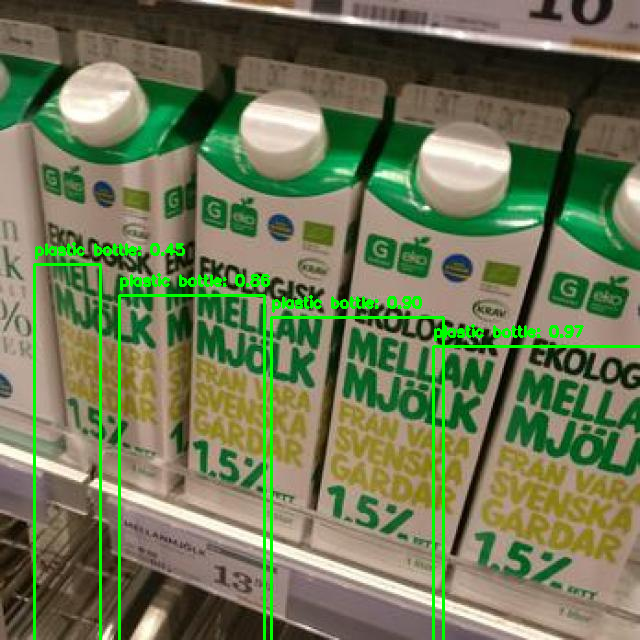

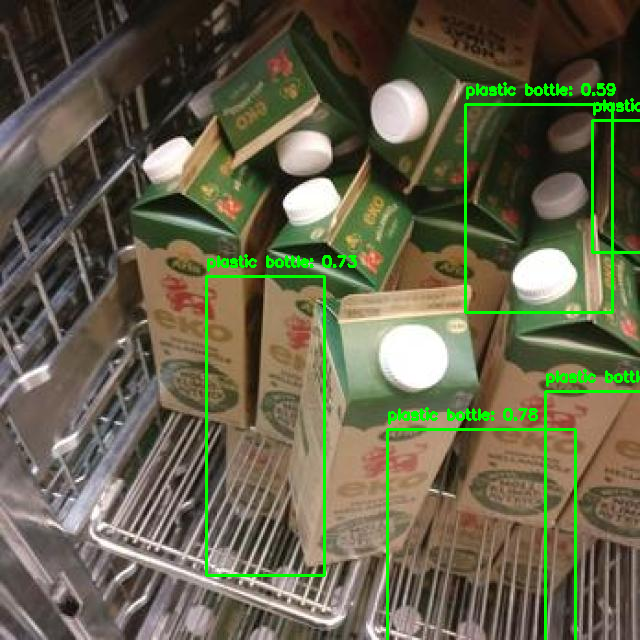

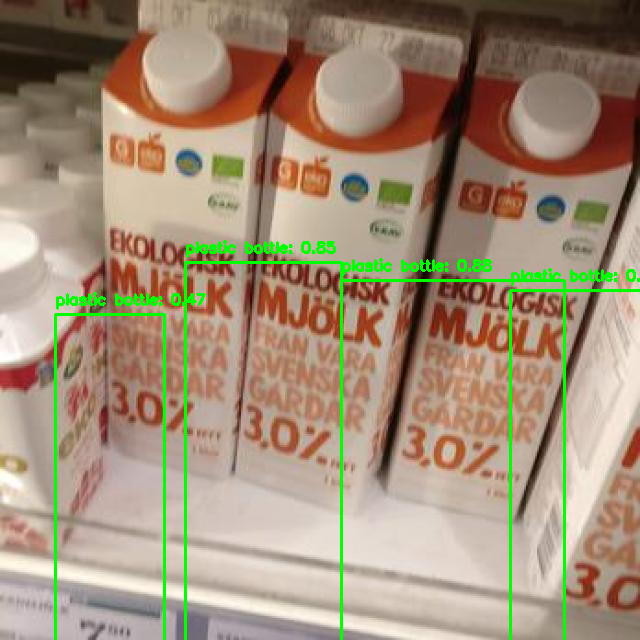

In [45]:
# Iterate over each image
for img_filename in img_test_paths:
      # Construct the full path to the image
      img_path = os.path.join(test_path, img_filename)


      # Read the image
      image = cv2.imread(img_path)

      image = cv2.resize(image, (640, 640))

      # Perform object detection on the image
      predictions = model.predict(image, confidence=40, overlap=30).json()

      # Iterate through the predictions and draw bounding boxes
      for prediction in predictions["predictions"]:
          x, y, width, height = map(int, (prediction['x'], prediction['y'], prediction['width'], prediction['height']))
          confidence = prediction['confidence']
          class_name = prediction['class']

          # Draw the bounding box on the image
          cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

          # Add text label with confidence and class name
          label = f'{class_name}: {confidence:.2f}'
          cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

      # Display the image with bounding boxes
      cv2_imshow(image)
      cv2.waitKey(0)
      cv2.destroyAllWindows()